<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Synopsis

With Python there are a number of options for plotting available, including:
- using pandas built-in functions
- using matplotlib functions directly
- using other libraries e.g. seaborn, plotly

# Matplotlib

`%matplotlib inline` is a **magic** command.<br>
It means when plotting matplotlib charts, embed them directly into the notebook

### Load libraries and import data

In [2]:
# load pandas
import pandas as pd

# include %matplotlib inline
%matplotlib inline

# Create a DataFrame called df_premiums from Insurance Premiums.csv
import pandas as pd
df_premiums = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/Insurance_Premiums.csv', index_col='Date', parse_dates=True)

### A quick plot of two columns, this uses matplotlib through pandas

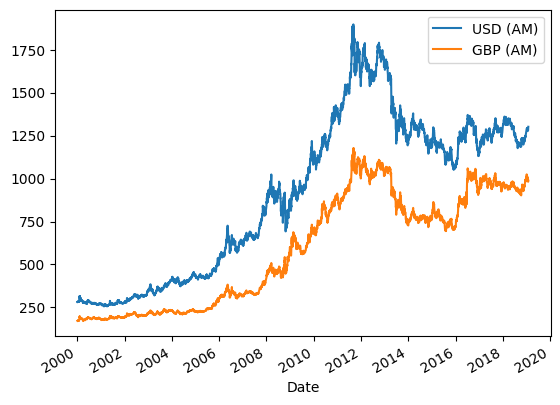

In [3]:
# line plot of 'USD (AM)' and 'GBP (AM)' columns
ax = df_premiums[ ['USD (AM)', 'GBP (AM)'] ].plot()

### Be more specific, plot a single column in red, add a title

<AxesSubplot: title={'center': 'Insurance Premiums'}, xlabel='Date'>

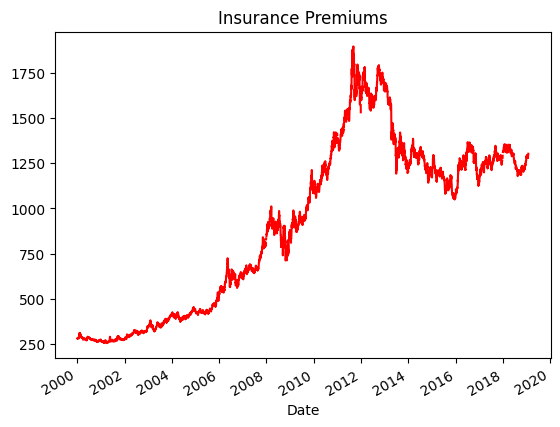

In [4]:
# some extra parameters - USD (AM) line, color and title
df_premiums['USD (PM)'].plot(kind='line', color='r', title='Insurance Premiums')

### For more fine-grained control we can call matplotlib directly

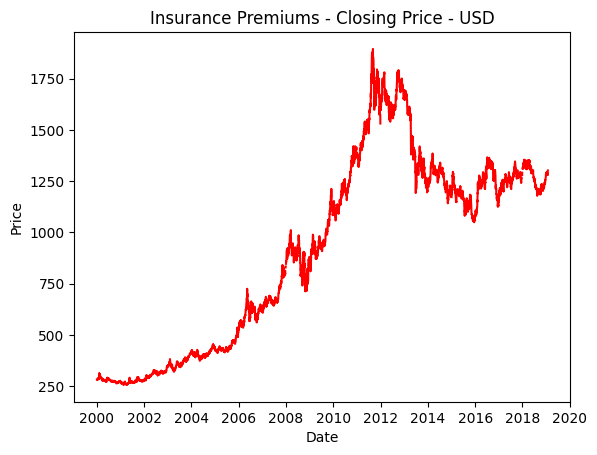

In [5]:
import matplotlib.pyplot as plt

# create same plot as above, but this time directly through matplotlib
x = df_premiums.index
y = df_premiums['USD (PM)']

plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Insurance Premiums - Closing Price - USD')

plt.show()

# Anatomy of a figure


<img style="float: left; margin-top: 0" width="300" src="https://neueda.conygre.com/pydata/images/subplot.png">
<img style="float: centre; margin-top: 0" width="300" src="https://neueda.conygre.com/pydata/images/figure.webp">
<br>


**NOTE** 
- difference between `axes` and `axis`
- both pronounced the same
- one is singlular, one is plural
- both refer to different parts of a figure
- axes contains mulitple axis
- here axes contains and x-axis and a y-axis

### Change style and plot multiple axes on a single figure

See styles at <a href="https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html">matplotlib styles</a>

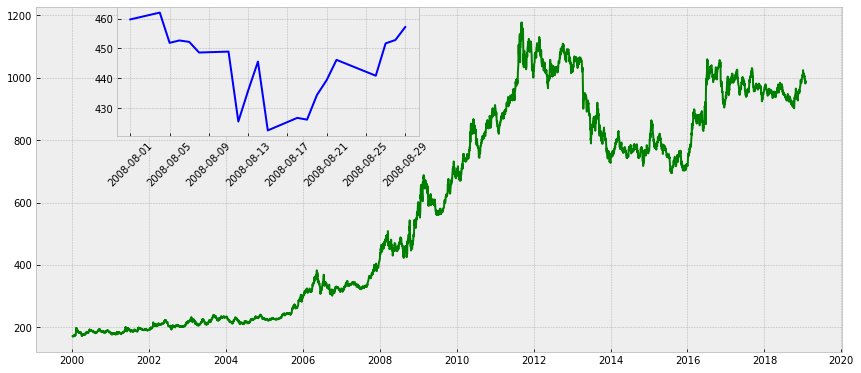

In [5]:
plt.style.use('bmh')

fig = plt.figure(figsize=(14, 6))

# left, bottom, width, height
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.18, 0.6, 0.3, 0.3])

x = df_premiums.index.date
y1 = df_premiums['GBP (AM)']

axes1.plot(x, y1, 'g')
axes2.plot(df_premiums['GBP (AM)']['Aug 2008'], 'b')

plt.xticks(rotation=45)

plt.show()

In [6]:
# save this figure
fig.savefig('example.png')

### Plot a histogram through pandas (uses matplotlib under the hood)

<AxesSubplot:>

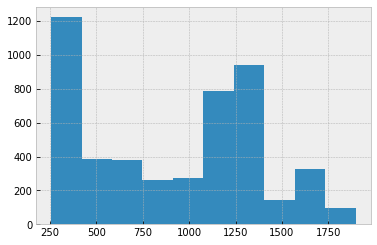

In [7]:
# 'USD (AM)' as a histogram?
df_premiums['USD (AM)'].hist()

### An area chart for 3 columns

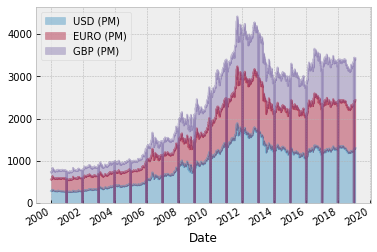

In [8]:
my_plot = df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].plot.area(alpha=0.4)

### We can save plots to file

In [9]:
# save to file
my_plot.get_figure().savefig('out.jpg')

### Stacked Bar Chart

<AxesSubplot:xlabel='Date'>

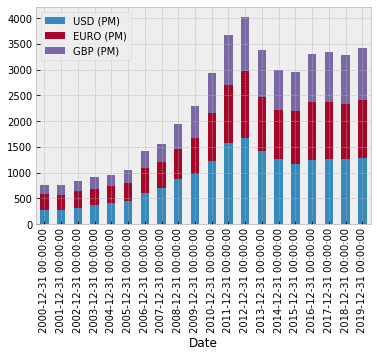

In [10]:
df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].resample(rule='Y').mean().plot.bar(stacked=True)

### Histograms

<AxesSubplot:ylabel='Frequency'>

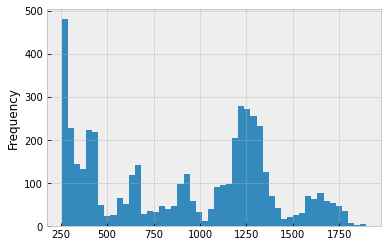

In [11]:
plt.style.use('bmh')
df_premiums['USD (PM)'].plot.hist(bins=50)

### Scatter Plots

<AxesSubplot:xlabel='USD (PM)', ylabel='EURO (PM)'>

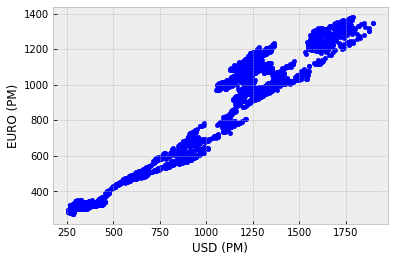

In [12]:
df_premiums.plot.scatter(x='USD (PM)', y='EURO (PM)')

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

<AxesSubplot:xlabel='USD (PM)', ylabel='EURO (PM)'>

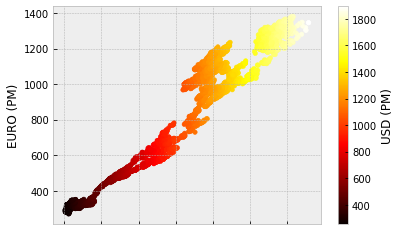

In [13]:
df_premiums.plot.scatter(x='USD (PM)', y='EURO (PM)', c='USD (PM)', cmap='hot')

### BoxPlots

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

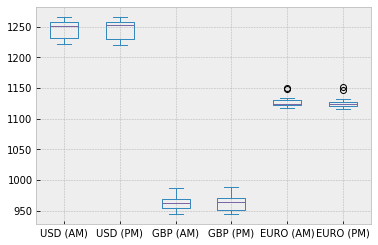

In [14]:
df_premiums['2017-MAY'].plot.box() # Can also pass a "by=..." argument for groupby

### Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

<AxesSubplot:xlabel='USD (PM)', ylabel='EURO (PM)'>

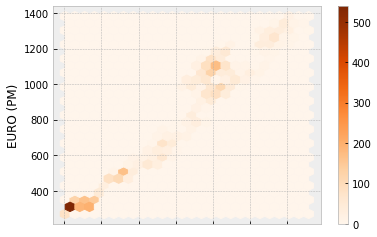

In [15]:
df_premiums.plot.hexbin(x='USD (PM)', y='EURO (PM)', gridsize=25, cmap='Oranges')

### Kernel Density Estimation plot (KDE)

<AxesSubplot:ylabel='Density'>

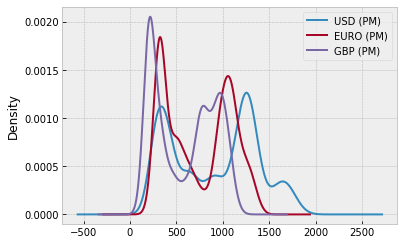

In [16]:
df_premiums[ ['USD (PM)', 'EURO (PM)', 'GBP (PM)'] ].plot.density()

### Styling the display of a DataFrame can also be a very useful visualisation tool

In [17]:
# highlight max and min in df_premiums.head()
df_premiums.head(10).style.highlight_max(color='lightgreen').highlight_min(color='red')

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2000-01-04 00:00:00,282.050000,281.500000,172.166000,171.929000,275.305000,272.402000
2000-01-05 00:00:00,282.100000,280.450000,171.729000,170.808000,272.035000,270.470000
2000-01-06 00:00:00,280.350000,279.400000,170.446000,169.518000,270.974000,269.152000
2000-01-07 00:00:00,282.000000,282.100000,171.324000,172.065000,273.840000,274.017000
2000-01-10 00:00:00,281.700000,281.600000,172.230000,171.959000,275.205000,274.812000
2000-01-11 00:00:00,281.700000,282.250000,171.590000,171.424000,273.469000,274.322000
2000-01-12 00:00:00,282.250000,282.250000,171.445000,171.372000,273.313000,274.269000
2000-01-13 00:00:00,282.200000,282.100000,171.467000,171.594000,273.874000,274.898000
2000-01-14 00:00:00,284.150000,283.300000,172.683000,172.439000,277.274000,277.881000


In [18]:
# set a background gradient
df_premiums.head(10).style.background_gradient(cmap='Blues')

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2000-01-04 00:00:00,282.050000,281.500000,172.166000,171.929000,275.305000,272.402000
2000-01-05 00:00:00,282.100000,280.450000,171.729000,170.808000,272.035000,270.470000
2000-01-06 00:00:00,280.350000,279.400000,170.446000,169.518000,270.974000,269.152000
2000-01-07 00:00:00,282.000000,282.100000,171.324000,172.065000,273.840000,274.017000
2000-01-10 00:00:00,281.700000,281.600000,172.230000,171.959000,275.205000,274.812000
2000-01-11 00:00:00,281.700000,282.250000,171.590000,171.424000,273.469000,274.322000
2000-01-12 00:00:00,282.250000,282.250000,171.445000,171.372000,273.313000,274.269000
2000-01-13 00:00:00,282.200000,282.100000,171.467000,171.594000,273.874000,274.898000
2000-01-14 00:00:00,284.150000,283.300000,172.683000,172.439000,277.274000,277.881000
